In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [35]:
# Read the data
sales = pd.read_csv('./train.csv')
sales.head()

/Users/khanhle/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [36]:
# Check null
sales.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [37]:
print(sales['Date'].max())
print(sales['Date'].min())
sales.describe().T

2015-07-31
2013-01-01


,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [9]:
sales.shape

(1017209, 9)

In [7]:
sales['Date'].nunique()

942

In [ ]:
# So we are able to use Date to predict the data.

In [41]:
# Select Date and Sales columns
sales_sort = sales[['Date', 'Sales']]

In [44]:
# We need to convert Date to datetime64
sales_sort['Date'] = pd.to_datetime(sales_sort['Date'])
#to_datetime
sales_sort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 2 columns):
Date     1017209 non-null datetime64[ns]
Sales    1017209 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 2 columns):
Date     1017209 non-null datetime64[ns]
Sales    1017209 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.5 MB


/Users/khanhle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [45]:
# Group by date and sum
sales_sort = sales_sort.groupby('Date').sum()

In [46]:
sales_sort.head()

,Sales
Date,
2013-01-01,97235
2013-01-02,6949829
2013-01-03,6347820
2013-01-04,6638954
2013-01-05,5951593


In [47]:
# sort data by date
sales_sort.sort_index()

,Sales
Date,
2013-01-01,97235
2013-01-02,6949829
2013-01-03,6347820
2013-01-04,6638954
2013-01-05,5951593
2013-01-06,143904
2013-01-07,10826848
2013-01-08,8749437
2013-01-09,7746603


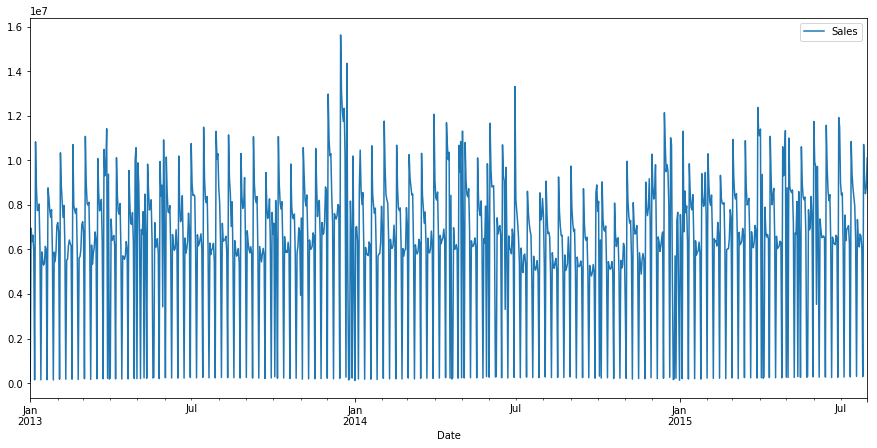

In [48]:
# sales_sort['Sales']
sales_sort.plot(figsize=(15, 7))
plt.show()

# Decomposing Time Series

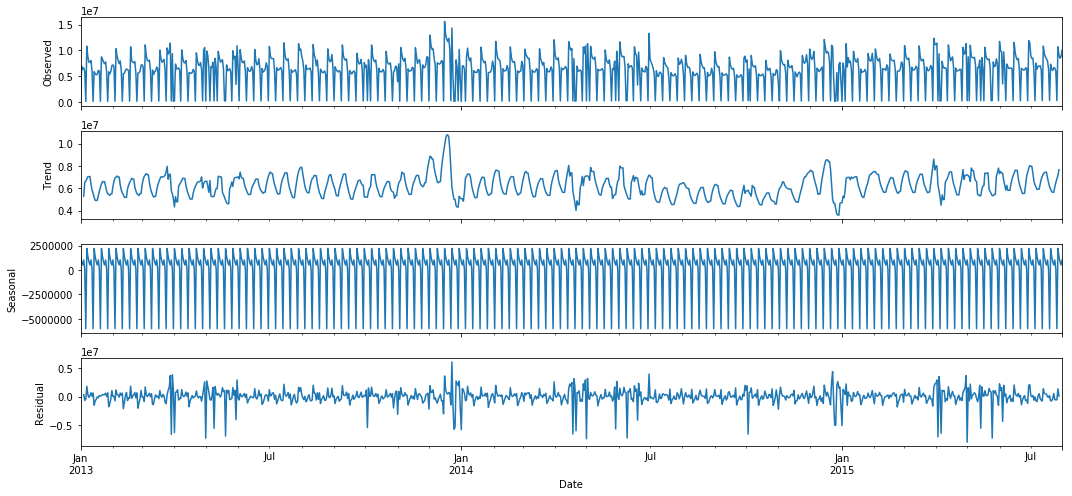

In [51]:
# import library
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams.update({'figure.figsize': (15,7), 'font.size': 10})

decomposition = seasonal_decompose(sales_sort['Sales'])
fig = decomposition.plot();
# sales_sort['2014':]
# sales_sort.info

# Fitting Model

In [52]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(sales_sort, order=(1, 1, 1))

model_fit = model.fit()


/Users/khanhle/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/khanhle/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/Users/khanhle/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2014-01-01    6.390680e+06
2014-01-02    6.481602e+06
2014-01-03    6.315586e+06
2014-01-04    6.316650e+06
2014-01-05    6.333253e+06
2014-01-06    6.467569e+06
2014-01-07    6.266684e+06
2014-01-08    6.234316e+06
2014-01-09    6.285271e+06
2014-01-10    6.305408e+06
2014-01-11    6.298604e+06
2014-01-12    6.355223e+06
2014-01-13    6.486909e+06
2014-01-14    6.341639e+06
2014-01-15    6.347804e+06
2014-01-16    6.346670e+06
2014-01-17    6.346676e+06
2014-01-18    6.331890e+06
2014-01-19    6.334706e+06
2014-01-20    6.466300e+06
2014-01-21    6.221618e+06
2014-01-22    6.280742e+06
2014-01-23    6.297644e+06
2014-01-24    6.309690e+06
2014-01-25    6.308332e+06
2014-01-26    6.353277e+06
2014-01-27    6.479910e+06
2014-01-28    6.343069e+06
2014-01-29    6.339402e+06
2014-01-30    6.337801e+06
                  ...     
2015-07-02    6.243033e+06
2015-07-03    6.258921e+06
2015-07-04    6.259558e+06
2015-07-05    6.320006e+06
2015-07-06    6.454876e+06
2015-07-07    6.278701e+06
2

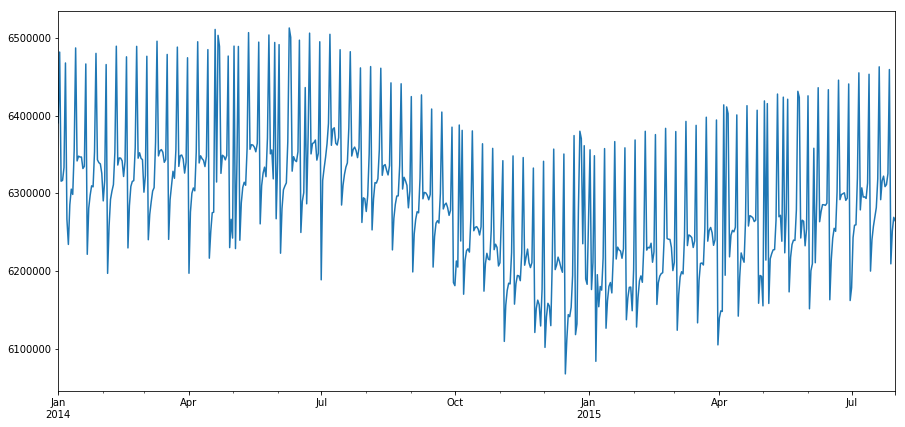

In [56]:
pred = model_fit.predict(start=pd.to_datetime('2014-01-01'), typ='levels')
pred.plot()
pred

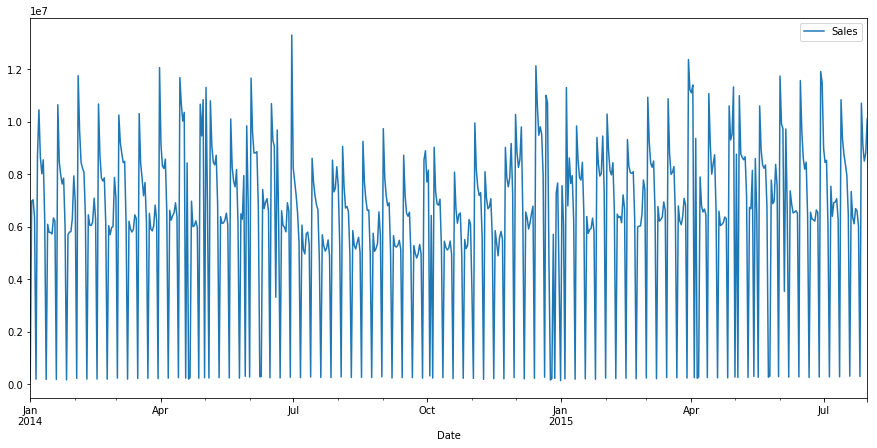

In [55]:
sales_sort['2014':].plot()